#Momentum for logistic regression: Implementation

#Import libraries and read csv file

In [1]:
# !pip install numdifftools

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# import numdifftools as nd

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [7]:
# samples = pd.read_csv("/content/drive/MyDrive/Spring 2022/Convex Optimization/HW2/samples.csv", header=None)

samples = pd.read_csv("/samples.csv", header=None)
samples = samples.rename(columns={100: 'y_i'})
samples.head(10), samples.shape
#first 10 values in ith row is vector x_i

(          0         1         2         3         4         5         6  \
 0  0.134045  1.063681 -1.815862  0.927972 -0.515753  1.235805 -0.538374   
 1 -0.609137 -1.737393  0.983550  0.427990 -0.217535  1.214781  1.108545   
 2  1.446955  1.748207  0.319515 -0.151143 -1.604053 -2.554450  0.969700   
 3  0.170554  1.663277  0.994616  0.732764 -0.566845  3.435520  0.803601   
 4 -0.686794 -0.473248 -0.810921 -0.509237  1.770041  1.817966  0.848877   
 5 -0.577596 -0.337928  1.505085 -1.149750  1.641355 -0.494324 -0.714113   
 6 -0.160544 -0.634033 -0.872816 -0.580369 -0.365382  0.081180 -0.526193   
 7 -1.081099 -0.526972 -0.777618  0.695623 -0.482618 -1.456852  3.057301   
 8  0.024311 -1.502828 -0.133785 -0.622276  1.251062  0.361587 -0.183304   
 9 -0.263578 -0.510679 -0.484048  0.484859  0.502508  0.644960 -0.127783   
 
           7         8         9  ...        91        92        93        94  \
 0 -1.773027  0.074969 -1.364702  ... -0.880270  0.734305 -2.077065  2.094701   


#Question 2:

##Objective Function:

In [8]:
d = 10
def obj_func(w): #w = (10,1) vector 
  N = 1000
  sum = 0
  d = 10
  x = np.array(samples.iloc[:,0:d]).T #(10,1000)
  ans = np.dot(w.T,x)#(1,1000)
  y = np.array(samples.iloc[:,-1]).reshape(-1,1) #(1000,1)
  here = -1.*np.dot(ans,y)
  f_w = np.log(1 + np.exp(here))/N
  return f_w #scalar

def deriv_obj_func(w): #w = (10,1) vector 
  N = 1000
  sum = 0
  d = 10
  x = np.array(samples.iloc[:,0:d]).T #(10,1000)
  ans = np.dot(w.T,x)#(1,1000)
  y = np.array(samples.iloc[:,-1]).reshape(-1,1) #(1000,1)
  here = -1.*np.dot(ans,y)
  # print(here.shape)
  here2 = np.sum(-1*(y.T@x.T))
  # print(here2.shape)
  # print(np.sum(here2))
  # print(here2)
  # deriv_f_w = (1/N)*((-1*np.dot(x,y))/(1 + np.exp(here))*np.exp(here))
  deriv_f_w = (1/N)*(here2)/(1 + np.exp(here))*np.exp(here)
  return deriv_f_w #scalar


In [ ]:
# deriv_obj_func(np.zeros((d,1)))

##Momentum Update:

In [10]:
def g_t(current_t,lam,w): #starts from t=1 since g(t=0) is calculated above
  if current_t == 0:
    # g_previous = np.zeros([1,d])
    # g[0,:] = lam*deriv_obj_func(w[:,t].reshape(-1,1)) #calculate g_0. Here, the w_t is (10x1) vector
    g[:,[0]] = lam*deriv_obj_func(w[:,0].reshape(-1,1)) #calculate g_0. Here, the w_t is (10x1) vector
  else:
    g[:,[current_t]] = ((1-lam)*g[:,[current_t-1]]) + (lam*deriv_obj_func(w[:,current_t].reshape(-1,1))) 
  return g[:,[current_t]]

def w_tplus1(current_t,eta,g):
  if current_t == 0:
    w[:,[1]] = -1*eta*g[:,[0]]
  elif current_t+1 == t:
    return w[:,[current_t]] - eta*g[:,[current_t]]
  else:
    w[:,[current_t+1]] = w[:,[current_t]] - eta*g[:,[current_t]]
  return w[:,[current_t+1]]

In [11]:
#Initializing:
lam_and_eta = [[0.01,0.01],[0.01,0.1],[0.01,1],[0.01,10],[0.01,100],
               [0.1,0.01],[0.1,0.1],[0.1,1],[0.1,10],
               [1,0.01],[1,0.1],[1,1]]
t = 1000 
w = np.zeros((d,t)) #(d,t) rather... each column has a distinct calculated w
g = np.zeros((d,t)) #each column has a distinct calculated g

In [12]:
#Running gradient descent with momentum
store_f_w = np.zeros((obj_func(w).shape[0],len(lam_and_eta)))

cnt=0
for k in lam_and_eta:
  for j in range(t):
    #calculating g_j first
    g_current = g_t(j,k[0],w)
    #calculating w_(j+1) then
    w_next = w_tplus1(j,k[1],g)

  #store_f[cnt] = obj_func(w_current) #stores f(w_t) values just for current lam&eta pair. 
  store_f_w[:,[cnt]] = obj_func(w)
  cnt+=1

  #renew w's and g's:
  w = np.zeros((d,t))
  g = np.zeros((d,t)) #each column has a distinct calculated g
# w,g,obj_func(w).shape[0]

In [13]:
# store_f_w[:,:]

##Final Deliverables:

### Question 1. Find the optimal value of this problem

In [14]:
import cvxpy as cp

In [15]:
#NEW: after office hours 
N = 1000
d = 10

w = cp.Variable([d, 1]) #(10,1)
x = np.array(samples.iloc[:,0:d]).T #(10,1000)
ans = w.T*x #(1,1000)
y = np.array(samples.iloc[:,-1]).reshape(-1,1) #(1000,1)
obj = cp.Minimize(cp.sum(cp.logistic(-1*ans*y)))
prob = cp.Problem(obj).solve() #prob is returning the loss 
w_opt = w.value
f_opt = prob



# cp.sum(cp.logistic(-1*ans*y))
# obj = cp.Minimize(cp.sum(cp.logistic(-1*ans*y))*(1/N))
# -1*y*ans
# cp.sum(cp.logistic(-1*y*ans))
# obj = cp.Minimize(cp.sum(cp.logistic(-1*y*ans))*(1/N))
# prob = cp.Problem(obj).solve()
# w_opt = w.value

In [16]:
print(prob) #this is f_opt (APPLY TO QUESTION 3)

-1.828497566941975e-08


In [17]:
# f_opt = obj_func(w_opt)

In [18]:
# f_deriv_opt = deriv_obj_func(w_opt)

In [19]:
# from numpy import linalg as LA

In [20]:
# norm = LA.norm(deriv_obj_func(w_opt),np.inf)

In [21]:
# w_opt, f_opt, f_deriv_opt, norm 
# # some people got 2.9068985932433127e-06 and TA said it should be around 10^-8
# print("f_optimum is " + str(f_opt))

### Question 2. Plotting variations

In [22]:
# store_f_w[:,[0]]-f_opt
# np.log(np.absolute(store_f_w-f_opt)).shape
# np.absolute(store_f_w[:,[i]]-f_opt)
str(lam_and_eta[0:5][1])
[str(lam_and_eta[0][1]),str(lam_and_eta[1][1]),str(lam_and_eta[2][1]),str(lam_and_eta[3][1]),str(lam_and_eta[4][1])]

['0.01', '0.1', '1', '10', '100']

Text(0.5, 1.0, 'Momentum for logistic regression: Implementation, gamma == 0.01, variable eta values')

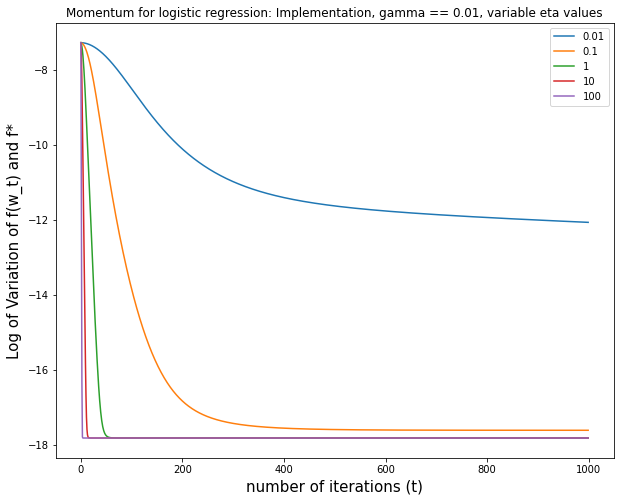

In [23]:
#store variations per lam_and_eta pair
variations_store = np.zeros((t,12))
for i in range(len(lam_and_eta)):
  variations_store[:,[i]] = np.absolute(store_f_w[:,[i]]-f_opt)
variations_store

#for gamma = 0.01
plt.figure(figsize = (10,8))
plt.plot(np.log(variations_store[:,0:5]), label = str(lam_and_eta[0:5][1]))
# print(np.log(variations_store[:,0:5]))
plt.legend([str(lam_and_eta[0][1]),str(lam_and_eta[1][1]),str(lam_and_eta[2][1]),
            str(lam_and_eta[3][1]),str(lam_and_eta[4][1])])
plt.xlabel(r'number of iterations (t)', fontsize = 15)
plt.ylabel(r'Log of Variation of f(w_t) and f*', fontsize = 15)
plt.title("Momentum for logistic regression: Implementation, gamma == 0.01, variable eta values")

Text(0.5, 1.0, 'Momentum for logistic regression: Implementation, gamma == 0.1, variable eta values')

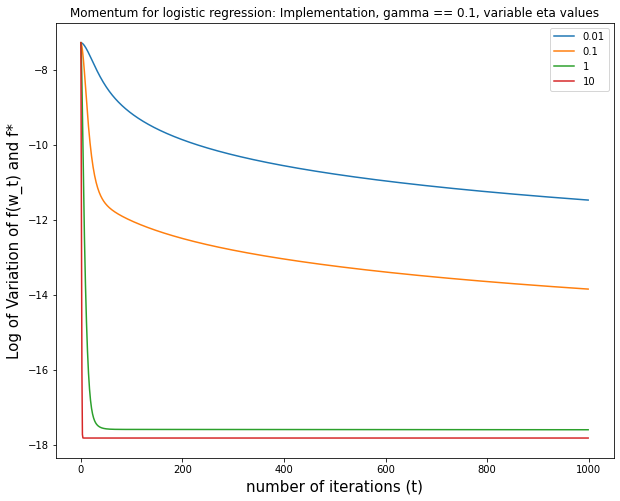

In [24]:
#for gamma = 0.1
plt.figure(figsize = (10,8))
plt.plot(np.log(variations_store[:,5:9]), label = str(lam_and_eta[5:9][1]))
# print(np.log(variations_store[:,5:9]))
# print(np.log(variations_store[:,9]))
plt.legend([str(lam_and_eta[5][1]),str(lam_and_eta[6][1]),str(lam_and_eta[7][1]),
            str(lam_and_eta[8][1])])
plt.xlabel(r'number of iterations (t)', fontsize = 15)
plt.ylabel(r'Log of Variation of f(w_t) and f*', fontsize = 15)
plt.title("Momentum for logistic regression: Implementation, gamma == 0.1, variable eta values")

Text(0.5, 1.0, 'Momentum for logistic regression: Implementation, gamma == 1, variable eta values')

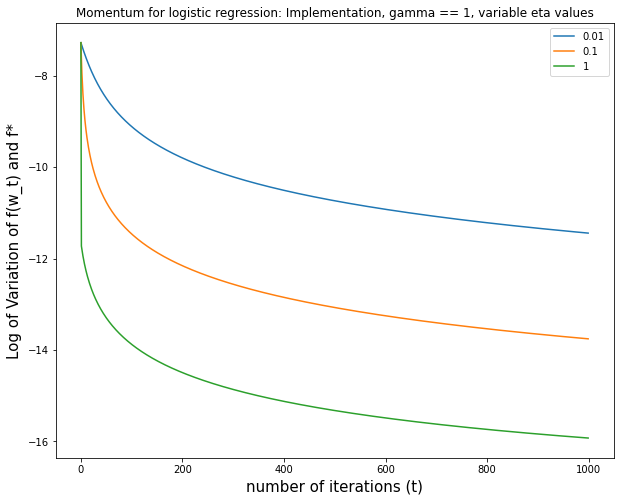

In [25]:
#for gamma = 1
plt.figure(figsize = (10,8))
plt.plot(np.log(variations_store[:,9:12]), label = str(lam_and_eta[9:12][1]))
# print(np.log(variations_store[:,9:12]))
plt.legend([str(lam_and_eta[9][1]),str(lam_and_eta[10][1]),str(lam_and_eta[11][1])])
plt.xlabel(r'number of iterations (t)', fontsize = 15)
plt.ylabel(r'Log of Variation of f(w_t) and f*', fontsize = 15)
plt.title("Momentum for logistic regression: Implementation, gamma == 1, variable eta values")

### Question 3. Filling table for $f(w_{1000})$ per lam_and_eta pair

In [26]:
pip install tabulate

In [27]:
from tabulate import tabulate

In [28]:
table = [[str(u'\u03B3' + " / " +  u'\u03B6'), '0.01', '0.1','1','10','100'],
         ['0.01',np.around(store_f_w[-1,[0]],decimals=6) ,np.around(store_f_w[-1,[1]],decimals=6) ,np.around(store_f_w[-1,[2]],decimals=6) ,np.around(store_f_w[-1,[3]],decimals=6) ,np.around(store_f_w[-1,[4]],decimals=6) ],
         ['0.1', np.around(store_f_w[-1,[5]],decimals=6) ,np.around(store_f_w[-1,[6]],decimals=6) ,np.around(store_f_w[-1,[7]],decimals=6) ,np.around(store_f_w[-1,[8]],decimals=6) ,"x"  ],
         ['1',np.around(store_f_w[-1,[9]],decimals=6) ,np.around(store_f_w[-1,[10]],decimals=6) ,np.around(store_f_w[-1,[11]],decimals=6) ,"x" ,"x" ]]

In [29]:
print(tabulate(table, headers='firstrow', tablefmt='fancy_grid'))

╒═════════╤═════════╤═══════╤═════╤══════╤═══════╕
│   γ / ζ │    0.01 │   0.1 │   1 │ 10   │ 100   │
╞═════════╪═════════╪═══════╪═════╪══════╪═══════╡
│    0.01 │ 6e-06   │ 0     │   0 │ [0.] │ [0.]  │
├─────────┼─────────┼───────┼─────┼──────┼───────┤
│    0.1  │ 1e-05   │ 1e-06 │   0 │ [0.] │ x     │
├─────────┼─────────┼───────┼─────┼──────┼───────┤
│    1    │ 1.1e-05 │ 1e-06 │   0 │ x    │ x     │
╘═════════╧═════════╧═══════╧═════╧══════╧═══════╛


###Question 4. In 1-2 sentences, summarize your observations.

When we have large eta values (e.g. 100) paired with small gamma values (e.g. 0.01), the log of variations in f(w_t) and f* become more stable (and rather sharply in some cases) much earlier in the iterations. I describe this as rather sharply because of the quick transition to a horizontal line earlier in the iteration; however when the gamma values are large and are paired with small eta values, the log of variation decreases much slowly.

#References:
1.   https://www.cvxpy.org/
2.   https://www.cvxpy.org/examples/machine_learning/logistic_regression.html
3. https://i-systems.github.io/teaching/ML/iNotes/06_Logistic_Regression.html#1.2.-Logistic-Regression-using-CVXPY
4. https://numpy.org/doc/stable/reference/generated/numpy.linalg.norm.html 
5. https://towardsdatascience.com/how-to-easily-create-tables-in-python-2eaea447d8fd
6. https://www.statology.org/runtimewarning-overflow-encountered-in-exp/

